# Poverty Analysis - Feature Reduction using PCA and t-SNE
Author - Prajakta Gaydhani

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Read Poverty dataset

In [3]:
train = pd.read_csv("final_cleaned.csv")

In [4]:
train = train.drop(columns = ['Unnamed: 0', 'Id', 'idhogar'])

## 2. Display Poverty data

In [5]:
train.head()

,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,...,escolari/age-sum,escolari/age-std,escolari/age-range_,inst/age-max,inst/age-std,inst/age-range_,tech-min,tech-sum,tech-std,tech-range_
0,0,0,0,1,1,1,0,0,0,0,...,0.232558,NaN,0.000000,0.069767,NaN,0.000000,1,1,NaN,0
1,0,0,0,1,1,0,0,0,0,0,...,0.179104,NaN,0.000000,0.104478,NaN,0.000000,2,2,NaN,0
2,0,0,0,1,1,0,0,0,0,0,...,0.119565,NaN,0.000000,0.043478,NaN,0.000000,0,0,NaN,0
3,0,0,0,1,1,1,0,0,0,0,...,1.366183,0.126943,0.279412,0.176471,0.033010,0.071207,2,8,0.0,0
4,0,1,0,1,1,1,0,0,0,0,...,0.965584,0.168946,0.392857,0.142857,0.060063,0.142857,1,4,0.0,0


## 3. Impute Missing Values and Standardize the data 

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), 
                      ('scaler', StandardScaler())])


target = train.Target
data = train.iloc[:, 1:train.shape[1]-1]

transformed_data = pd.DataFrame(pipeline.fit_transform(data), columns=data.columns) 

In [8]:
transformed_data.head()

,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,...,escolari/age-max,escolari/age-sum,escolari/age-std,escolari/age-range_,inst/age-max,inst/age-std,inst/age-range_,tech-min,tech-sum,tech-std
0,-0.147138,-0.110713,0.075835,0.223133,0.810673,-0.29025,-0.473777,-0.520108,-0.092089,-0.358750,...,-0.807943,-0.998146,0.123412,-1.420157,-0.970710,-0.062711,-1.265703,-0.373942,-1.123207,0.0
1,-0.147138,-0.110713,0.075835,0.223133,-1.233543,-0.29025,-0.473777,-0.520108,-0.092089,2.787456,...,-1.105119,-1.093570,0.123412,-1.420157,-0.588353,-0.062711,-1.265703,1.715773,-0.732189,0.0
2,-0.147138,-0.110713,0.075835,0.223133,-1.233543,-0.29025,-0.473777,-0.520108,-0.092089,2.787456,...,-1.436127,-1.199858,0.123412,-1.420157,-1.260303,-0.062711,-1.265703,-2.463657,-1.514226,0.0
3,-0.147138,-0.110713,0.075835,0.223133,0.810673,-0.29025,-0.473777,-0.520108,-0.092089,-0.358750,...,0.842415,1.025563,-0.386532,0.059194,0.204698,-0.847064,-0.481184,1.715773,1.613920,0.0
4,6.796358,-0.110713,0.075835,0.223133,0.810673,-0.29025,-0.473777,-0.520108,-0.092089,-0.358750,...,0.083239,0.310428,0.167679,0.659832,-0.165577,-0.145849,0.308208,-0.373942,0.049847,0.0


## 4. Feature Reduction - PCA and t-SNE

In [9]:
import time
from sklearn.base import clone
def transform_data(tr_, X_, configs_, tr_name_):
    X_tr = {}
    for i,params in configs_.items():
        print('---------- {} -----------'.format(params))
        t_start = time.clock()
        X_tr[i] = clone(tr_).set_params(**params).fit_transform(transformed_data)
        t_end = time.clock()
        print('{} fitted in {} sec'.format(tr_name_, t_end-t_start))
    return X_tr

In [46]:
colors=['r','b','y','g']
label_value= ["Non-Vulnerable", "Vulnerable","Moderate", "Extreme"]
def plot_transformed_data(X_tr_, y_, configs_, tr_name_):
    for j, X_ in X_tr_.items():
        plt.figure(figsize=(14,6))
        for i in [0,1, 2, 3]:
            plt.scatter(X_[y_==i,0], X_[y_==i,1], c=colors[i], s=5, label=label_value[i])
        plt.legend()
        #plt.title('{}: {}'.format(tr_name_, configs_[j]))

### 4.1  Implement PCA and t-SNE algorithms for different hyper-parameters

In [13]:
from sklearn.manifold import TSNE
tsne_configs = {1: dict(init='random'),
                2: dict(init='pca'),
                3: dict(init='pca', n_iter=5000),
                4: dict(init='pca', n_iter=500),
                5: dict(init='pca', learning_rate=50),
                6: dict(init='pca', learning_rate=500),
                7: dict(init='pca', perplexity=15),
                8: dict(init='pca', perplexity=50)}
X_tsne = transform_data(TSNE(n_components=2, random_state=314), 
                        transformed_data, 
                        tsne_configs, 
                        't-SNE')

---------- {'init': 'random'} -----------
t-SNE fitted in 84.951008 sec
---------- {'init': 'pca'} -----------
t-SNE fitted in 87.00179200000001 sec
---------- {'init': 'pca', 'n_iter': 5000} -----------
t-SNE fitted in 421.68150199999997 sec
---------- {'init': 'pca', 'n_iter': 500} -----------
t-SNE fitted in 49.67654600000003 sec
---------- {'init': 'pca', 'learning_rate': 50} -----------
t-SNE fitted in 85.90040599999998 sec
---------- {'init': 'pca', 'learning_rate': 500} -----------
t-SNE fitted in 89.75228499999992 sec
---------- {'init': 'pca', 'perplexity': 15} -----------
t-SNE fitted in 80.72576200000003 sec
---------- {'init': 'pca', 'perplexity': 50} -----------
t-SNE fitted in 107.86928300000011 sec


### 4.2 Visualize the ouputs of PCA and t-SNE algorithms for different hyper-parameters

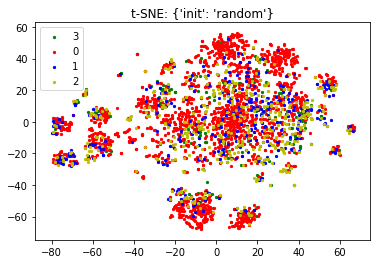

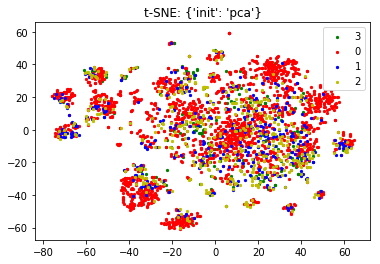

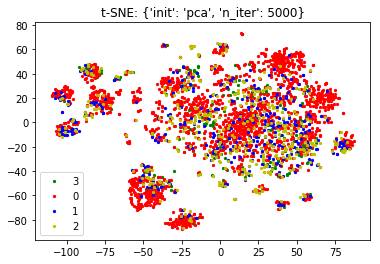

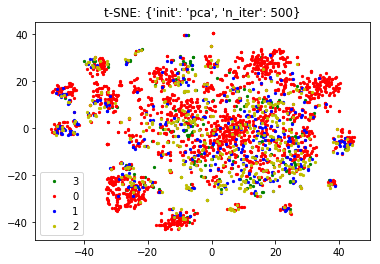

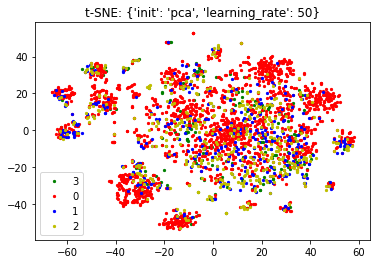

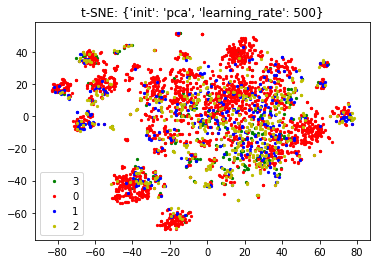

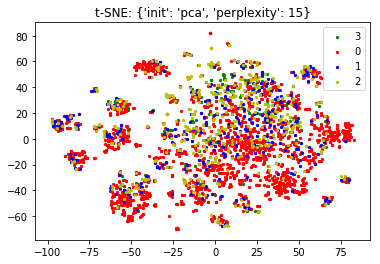

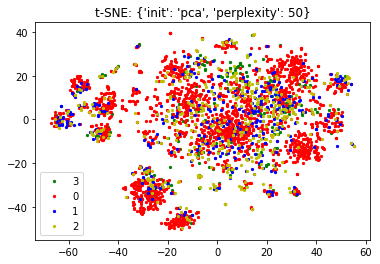

In [30]:
plot_transformed_data(X_tsne, target, tsne_configs, 't-SNE')